In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv("./Final_Combined_Dataset.csv")
df=df.set_index(keys="zpid")
df

,bedrooms,bathrooms,price,zipcode,hdpUrl,cityId,homeType,livingArea,livingAreaValue,rentZestimate,...,originalPhotos,address.streetAddress,address.city,address.state,address.zipcode,image_captions,leisure_within_5km,shops_within_5km,schools_within_5km,transit_within_2km
zpid,,,,,,,,,,,,,,,,,,,,,
100650,3.0,2.0,122400,35172,/homedetails/513-Hagwood-Cir-Trafford-AL-35172...,NaN,SINGLE_FAMILY,1400.0,1400.0,1200.0,...,['https://photos.zillowstatic.com/fp/933bbfddb...,513 Hagwood Cir,Trafford,AL,35172,a photograph of a house in the woods with a po...,0,0,0,0
394191,2.0,2.0,1475000,20037,/homedetails/2555-Pennsylvania-Ave-NW-APT-501-...,41568.0,CONDO,1590.0,1590.0,NaN,...,['https://photos.zillowstatic.com/fp/7728b70d7...,2555 Pennsylvania Ave NW APT 501,Washington,DC,20037,a photograph of a large building with a lot of...,16,167,118,159
394956,2.0,3.0,1200000,20037,/homedetails/800-25th-St-NW-1001-Washington-DC...,41568.0,CONDO,2007.0,2007.0,6999.0,...,['https://photos.zillowstatic.com/fp/947993164...,800 25th St NW #1001,Washington,DC,20037,a photograph of a building with cars parked in...,14,161,104,150
395184,0.0,1.0,255000,20037,/homedetails/922-24th-St-NW-APT-309-Washington...,41568.0,APARTMENT,498.0,498.0,1892.0,...,['https://photos.zillowstatic.com/fp/0a2f90e81...,922 24th St NW APT 309,Washington,DC,20037,a photograph of a large building with a lot of...,17,168,108,168
395274,0.0,1.0,285000,20037,/homedetails/922-24th-St-NW-APT-820-Washington...,41568.0,CONDO,465.0,465.0,1914.0,...,['https://photos.zillowstatic.com/fp/dcf342b52...,922 24th St NW APT 820,Washington,DC,20037,"a photograph of a bedroom with a bed, couch, a...",17,168,108,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140770427,2.0,2.0,236800,94089,/homedetails/1111-Morse-Ave-SPC-101-Sunnyvale-...,54626.0,MANUFACTURED,1440.0,1440.0,464.0,...,['https://photos.zillowstatic.com/fp/5577a7caa...,1111 Morse Ave SPC 101,Sunnyvale,CA,94089,a photograph of a mobile home with a flag on t...,0,0,0,0
2141107496,10.0,4.0,395000,60609,/homedetails/1822-W-46th-St-Chicago-IL-60609/2...,17426.0,MULTI_FAMILY,NaN,NaN,NaN,...,['https://photos.zillowstatic.com/fp/91d4eff7c...,1822 W 46th St,Chicago,IL,60609,a photograph of a two story brick building wit...,0,33,41,186
2144732235,2.0,2.0,1650000,2116,/homedetails/221-Columbus-Ave-APT-603-Boston-M...,44269.0,CONDO,1508.0,1508.0,5726.0,...,['https://photos.zillowstatic.com/fp/9d1560a0d...,221 Columbus Ave APT 603,Boston,MA,2116,a photograph of a building with a large entran...,0,0,0,0


In [4]:
df.columns

Index(['bedrooms', 'bathrooms', 'price', 'zipcode', 'hdpUrl', 'cityId',
       'homeType', 'livingArea', 'livingAreaValue', 'rentZestimate',
       'description', 'latitude', 'longitude', 'homeInsights', 'photoCount',
       'originalPhotos', 'address.streetAddress', 'address.city',
       'address.state', 'address.zipcode', 'image_captions',
       'leisure_within_5km', 'shops_within_5km', 'schools_within_5km',
       'transit_within_2km'],
      dtype='object')

In [5]:
df1=df.drop(columns=['zipcode','hdpUrl','cityId','livingAreaValue','rentZestimate','photoCount','address.streetAddress','originalPhotos','latitude','longitude'])

df1

,bedrooms,bathrooms,price,homeType,livingArea,description,homeInsights,address.city,address.state,address.zipcode,image_captions,leisure_within_5km,shops_within_5km,schools_within_5km,transit_within_2km
zpid,,,,,,,,,,,,,,,
100650,3.0,2.0,122400,SINGLE_FAMILY,1400.0,REO Occupied – NO ACCESS OR VIEWINGS of this p...,[{'insights': [{'modelId': 'v2-2-backfill-samp...,Trafford,AL,35172,a photograph of a house in the woods with a po...,0,0,0,0
394191,2.0,2.0,1475000,CONDO,1590.0,OPEN SATURDAY AND SUNDAY - 1-4 ! RARELY AVAILA...,"[{'insights': [{'modelId': 'z-nrt-pdc-tags', '...",Washington,DC,20037,a photograph of a large building with a lot of...,16,167,118,159
394956,2.0,3.0,1200000,CONDO,2007.0,NEW ON THE MARKET! Estate Sale being sold stri...,"[{'insights': [{'modelId': 'z-nrt-pdc-tags', '...",Washington,DC,20037,a photograph of a building with cars parked in...,14,161,104,150
395184,0.0,1.0,255000,APARTMENT,498.0,Beautiful studio condominium located in the vi...,"[{'insights': [{'modelId': 'z-nrt-pdc-tags', '...",Washington,DC,20037,a photograph of a large building with a lot of...,17,168,108,168
395274,0.0,1.0,285000,CONDO,465.0,Luxury living in the heart of Foggy Bottom. We...,"[{'insights': [{'modelId': 'z-nrt-pdc-tags', '...",Washington,DC,20037,"a photograph of a bedroom with a bed, couch, a...",17,168,108,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140770427,2.0,2.0,236800,MANUFACTURED,1440.0,Your home awaits in this recently updated 2-be...,"[{'insights': [{'modelId': 'z-nrt-pdc-tags', '...",Sunnyvale,CA,94089,a photograph of a mobile home with a flag on t...,0,0,0,0
2141107496,10.0,4.0,395000,MULTI_FAMILY,NaN,SOLID BRICK BUILDING WITH 4 legal unit PLUS 1 ...,"[{'insights': [{'modelId': 'z-nrt-pdc-tags', '...",Chicago,IL,60609,a photograph of a two story brick building wit...,0,33,41,186
2144732235,2.0,2.0,1650000,CONDO,1508.0,Iconic South End architecture at the Albert A....,"[{'insights': [{'modelId': 'z-nrt-pdc-tags', '...",Boston,MA,2116,a photograph of a building with a large entran...,0,0,0,0


In [6]:
null_percentage = (df1.isnull().sum() / len(df1)) * 100
null_percentage

bedrooms              1.831027
bathrooms             1.715686
price                 0.000000
homeType              0.000000
livingArea            1.485006
description           1.196655
homeInsights          5.017301
address.city          0.000000
address.state         0.000000
address.zipcode       0.000000
image_captions        0.432526
leisure_within_5km    0.000000
shops_within_5km      0.000000
schools_within_5km    0.000000
transit_within_2km    0.000000
dtype: float64

In [7]:
df1['leisure_within_5km'].median(),df1['transit_within_2km'].median(),df1['schools_within_5km'].median(),df1['transit_within_2km'].median()


(0.0, 0.0, 1.0, 0.0)

In [8]:
mode_value = df1['bedrooms'].mode()[0]
mod_1=df1['bathrooms'].mode()[0]
living_mod=df1['livingArea'].mean()
# Replace null values with the mode
df1['bedrooms']=df1['bedrooms'].fillna(mode_value)
df1['bathrooms']=df1['bathrooms'].fillna(mod_1)
df1['livingArea']=df1['livingArea'].fillna(living_mod)

columns_to_check = ['description', 'homeInsights','image_captions']

# Remove rows with all null values in specified columns
df1 = df1.dropna(subset=columns_to_check, how='all')
df1

,bedrooms,bathrooms,price,homeType,livingArea,description,homeInsights,address.city,address.state,address.zipcode,image_captions,leisure_within_5km,shops_within_5km,schools_within_5km,transit_within_2km
zpid,,,,,,,,,,,,,,,
100650,3.0,2.0,122400,SINGLE_FAMILY,1400.000000,REO Occupied – NO ACCESS OR VIEWINGS of this p...,[{'insights': [{'modelId': 'v2-2-backfill-samp...,Trafford,AL,35172,a photograph of a house in the woods with a po...,0,0,0,0
394191,2.0,2.0,1475000,CONDO,1590.000000,OPEN SATURDAY AND SUNDAY - 1-4 ! RARELY AVAILA...,"[{'insights': [{'modelId': 'z-nrt-pdc-tags', '...",Washington,DC,20037,a photograph of a large building with a lot of...,16,167,118,159
394956,2.0,3.0,1200000,CONDO,2007.000000,NEW ON THE MARKET! Estate Sale being sold stri...,"[{'insights': [{'modelId': 'z-nrt-pdc-tags', '...",Washington,DC,20037,a photograph of a building with cars parked in...,14,161,104,150
395184,0.0,1.0,255000,APARTMENT,498.000000,Beautiful studio condominium located in the vi...,"[{'insights': [{'modelId': 'z-nrt-pdc-tags', '...",Washington,DC,20037,a photograph of a large building with a lot of...,17,168,108,168
395274,0.0,1.0,285000,CONDO,465.000000,Luxury living in the heart of Foggy Bottom. We...,"[{'insights': [{'modelId': 'z-nrt-pdc-tags', '...",Washington,DC,20037,"a photograph of a bedroom with a bed, couch, a...",17,168,108,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140770427,2.0,2.0,236800,MANUFACTURED,1440.000000,Your home awaits in this recently updated 2-be...,"[{'insights': [{'modelId': 'z-nrt-pdc-tags', '...",Sunnyvale,CA,94089,a photograph of a mobile home with a flag on t...,0,0,0,0
2141107496,10.0,4.0,395000,MULTI_FAMILY,1820.995024,SOLID BRICK BUILDING WITH 4 legal unit PLUS 1 ...,"[{'insights': [{'modelId': 'z-nrt-pdc-tags', '...",Chicago,IL,60609,a photograph of a two story brick building wit...,0,33,41,186
2144732235,2.0,2.0,1650000,CONDO,1508.000000,Iconic South End architecture at the Albert A....,"[{'insights': [{'modelId': 'z-nrt-pdc-tags', '...",Boston,MA,2116,a photograph of a building with a large entran...,0,0,0,0


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


label_encoder = LabelEncoder()
df1['homeType'] = label_encoder.fit_transform(df1['homeType'])

C:\Users\kalya\AppData\Local\Temp\ipykernel_22064\3433511660.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['homeType'] = label_encoder.fit_transform(df1['homeType'])


In [10]:
dfs_by_category = {}

# Get unique values in the 'Category' column
unique_categories = df1['address.state'].unique()

# Iterate over unique categories
for category in unique_categories:
    # Filter the DataFrame for the current category
    filtered_df = df1[df1['address.state'] == category]
    
    # Add the filtered DataFrame to the dictionary with category as the key
    dfs_by_category[category] = filtered_df

# Access the DataFrames using category keys
for category, df_category in dfs_by_category.items():
    print(f"Category: {category}")
    print(len(df_category))
    # print(df_category)

Category: AL
110
Category: DC
497
Category: IL
500
Category: NV
494
Category: Las Vegas
1
Category: AZ
496
Category: PA
497
Category: GA
494
Category: CA
1296
Category: TX
559
Category: NY
500
Category: FL
500
Category: MA
494
Category: MI
496
Category: ['https://photos.zillowstatic.com/fp/b721ed70b8f89663562a09d6a0bc0c0f-o_a.jpg', 'https://photos.zillowstatic.com/fp/7748fb50d89a7bf4233a5d85c16fde42-o_a.jpg', 'https://photos.zillowstatic.com/fp/ecfba145de869f95ceb6ef3caa481797-o_a.jpg', 'https://photos.zillowstatic.com/fp/b610ce04c006a420be34dc4362e99702-o_a.jpg', 'https://photos.zillowstatic.com/fp/71568e02f22bbfcdfdea6042ea5a102d-o_a.jpg', 'https://photos.zillowstatic.com/fp/e4e06bd81379cfbc3bfcd420244f9a96-o_a.jpg', 'https://photos.zillowstatic.com/fp/696adb577dc147576dae7f1a279dc453-o_a.jpg', 'https://photos.zillowstatic.com/fp/b18a2ae772d329a4e5693f88c73c9b11-o_a.jpg', 'https://photos.zillowstatic.com/fp/5ca6266575b5ae8505b12870cf26f38d-o_a.jpg', 'https://photos.zillowstatic.com/f

In [11]:
MSE= {}
for key,value in dfs_by_category.items():
    if(len(value)>20):
        df_check=value
        df_check=df_check.drop(columns=['description','homeInsights','image_captions','address.city','address.state'])
        scaler=StandardScaler()
        X=scaler.fit_transform(df_check)
        sse = []
        # Try different values of k (number of clusters)
        for k in range(2, 40):
            kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
            kmeans.fit(X)
            sse.append(kmeans.inertia_) 
        
        MSE[key]=sse

c:\Users\kalya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kalya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kalya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kalya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [12]:
MSE

{'AL': [453.58711321160973,
  345.2757543365967,
  237.730539695036,
  176.51377805608826,
  142.67916166622257,
  124.83786631153544,
  103.51229365228484,
  87.39194592007101,
  77.81070590662983,
  68.98895233801508,
  62.63784927206358,
  54.46212379726438,
  49.030845411526904,
  46.22140250480321,
  41.79259465784033,
  37.28434064426261,
  34.92271289931316,
  32.41717404073208,
  29.312353878136438,
  25.78159493858037,
  24.44257805393633,
  23.614483757680865,
  21.304463185744368,
  20.320198050872857,
  18.623730522389888,
  17.37081811552819,
  16.669755022022862,
  15.858871324157068,
  14.287020703370148,
  13.525178970108238,
  13.017654520970742,
  11.244026231305234,
  11.020422577917975,
  10.416872797351358,
  9.421207094246874,
  9.18006987604196,
  8.513435307139856,
  7.658367633140241],
 'DC': [3706.1819710597865,
  2917.6522225442086,
  2459.0116697803064,
  2093.145594862419,
  1865.4579937772387,
  1724.2147902401607,
  1605.9885050256064,
  1498.197164289142

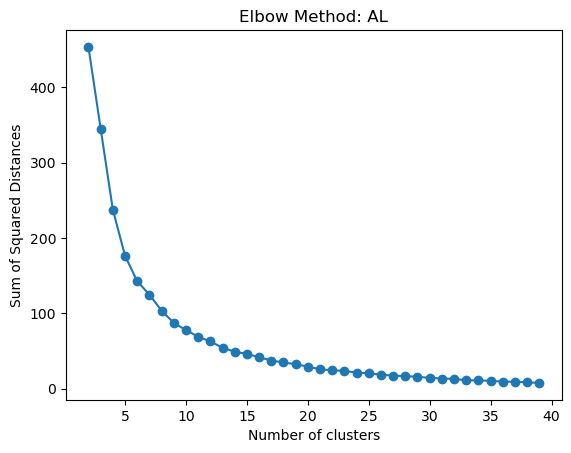

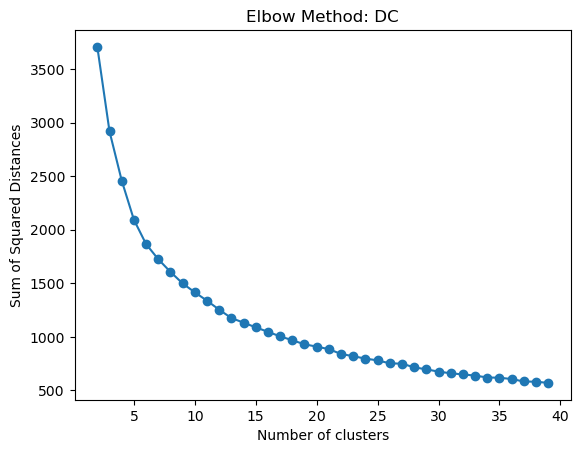

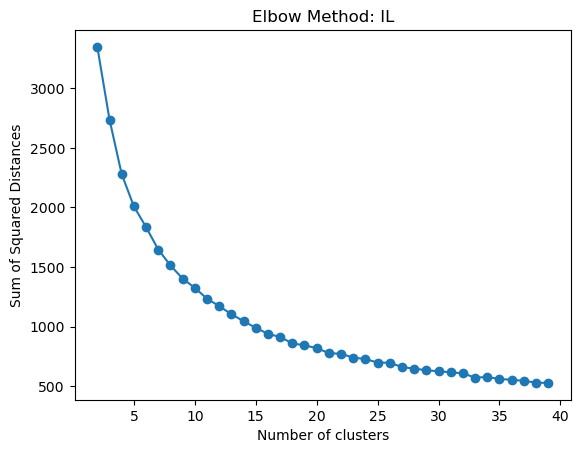

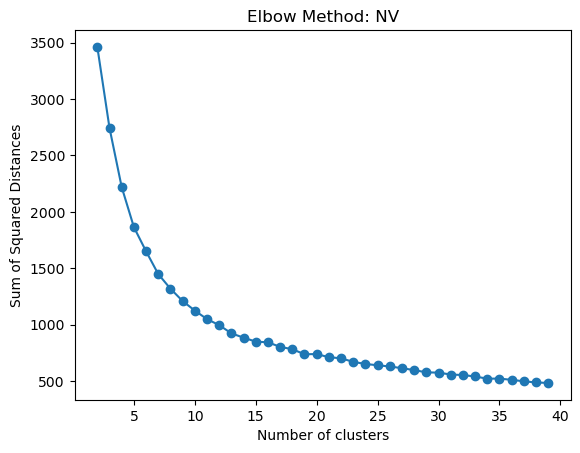

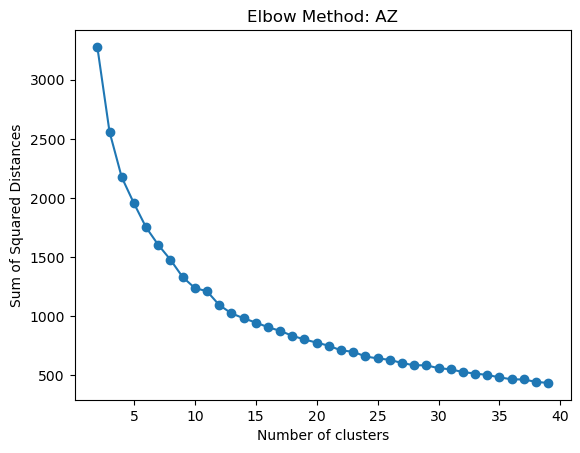

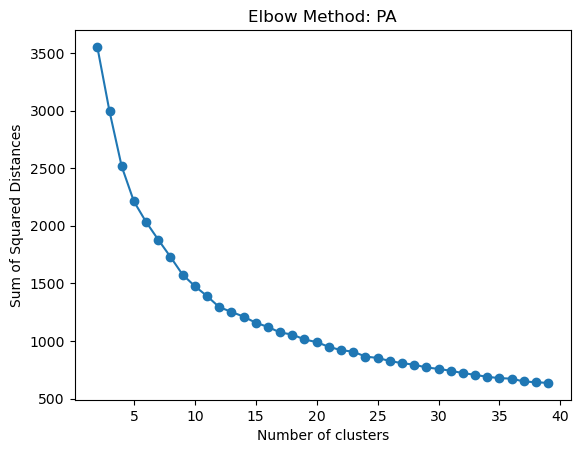

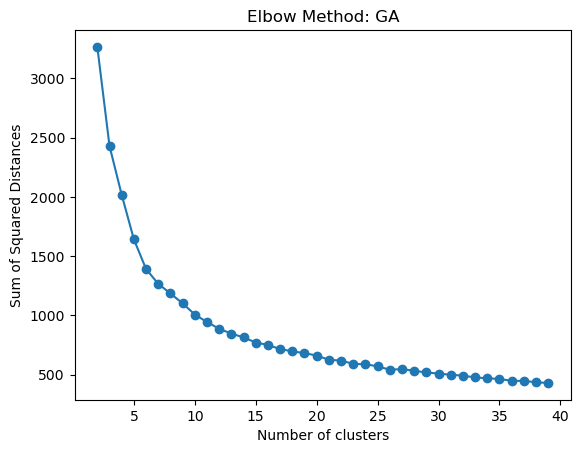

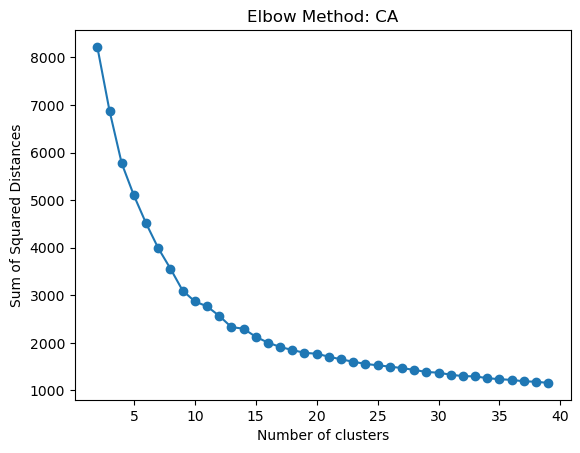

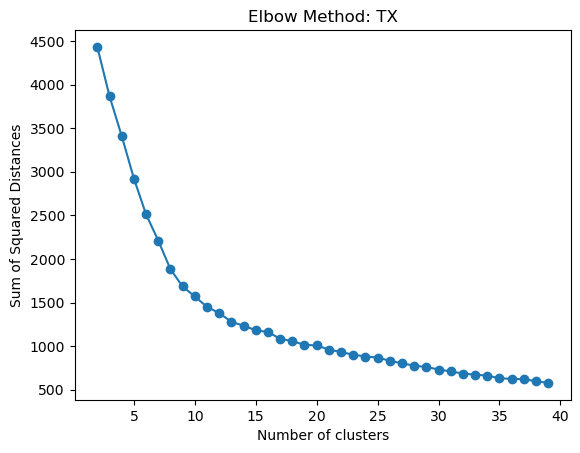

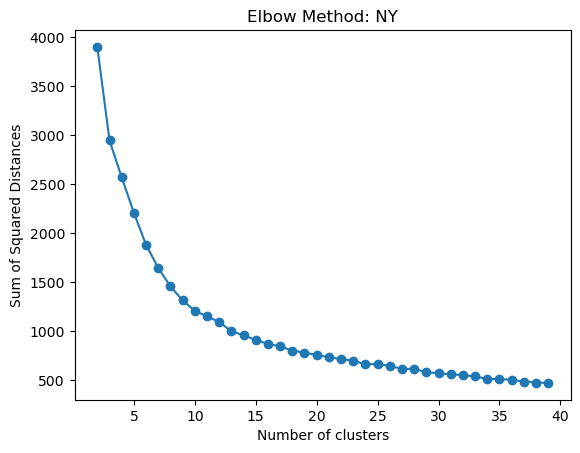

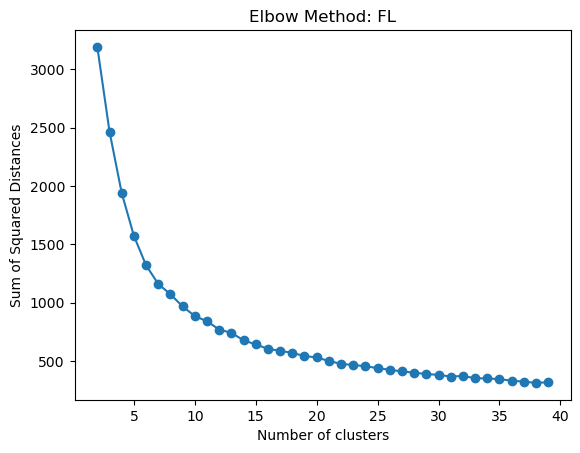

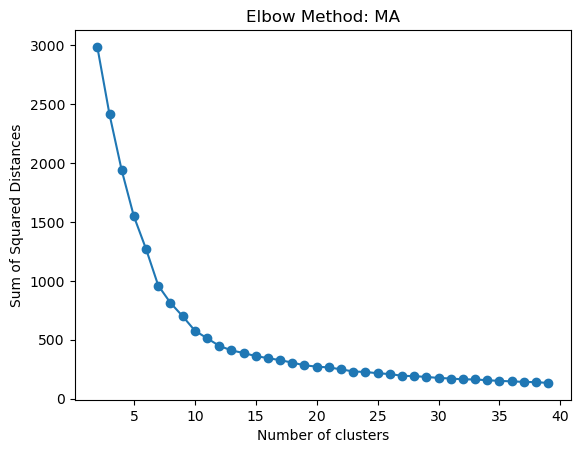

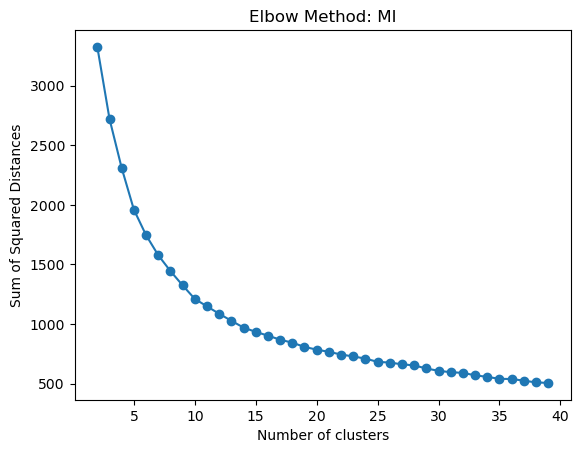

In [14]:
for key,value in MSE.items():
        
    plt.plot(range(2, 40), value, marker='o')
    plt.title(f'Elbow Method: {key}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of Squared Distances')
    plt.show()

In [ ]:
kmeans=KMeans(n_clusters=20)
df_check=dfs_by_category['NY'].drop(columns=['description','homeInsights','image_captions','address.city','address.state'])

kmeans.fit(scaler.fit_transform(df_check))
kmeans.labels_

c:\Users\kalya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kalya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([12, 12, 15,  0,  5,  5,  5,  7,  7, 18,  5, 19,  5,  5,  7,  5,  5,
        5,  7,  0,  0,  0, 13, 16,  1, 15,  5,  5,  5,  7,  5,  5,  5, 13,
       13,  5,  7, 19,  7,  7, 13,  0,  0,  7,  0,  0,  3,  3,  8, 13,  0,
       14, 14,  9,  1, 10,  0, 11,  1,  0,  6,  3,  5,  3,  1, 15,  7, 15,
        9, 18,  5, 13,  0, 15, 15,  0, 13,  7,  5,  0,  0, 15,  5,  7,  0,
       13, 13, 13,  0, 13,  3, 13,  0,  3, 15,  9,  9,  9, 15,  3, 15,  9,
        0, 16,  5, 18,  5, 13, 13, 13, 15,  5, 13,  1,  9,  9, 13,  2, 13,
        5,  7,  5,  9,  7,  7, 16,  7,  7,  0, 15,  7,  5, 16, 16,  0, 15,
        0, 13,  5,  2,  3,  7,  3, 16,  3,  8,  7,  5,  0,  0, 15,  3, 15,
       15, 16,  7, 15,  5, 15,  3, 15,  1, 16, 13,  5,  5, 16,  7, 15,  5,
        2,  2,  2,  5,  7, 15, 16, 11, 15, 16, 13, 15,  2,  5, 13,  5,  2,
        0,  5, 16, 16, 12,  3,  0,  5,  5,  5,  0,  9,  5, 15, 13,  0,  5,
        5,  5,  0, 15,  3, 13, 16,  9, 16,  5,  3,  5,  5, 15,  2,  3,  9,
        5,  5,  5,  3,  7

In [ ]:
cluster_centers=scaler.inverse_transform(kmeans.cluster_centers_)
cols=df_check.columns
df_cluster_centers=pd.DataFrame(cluster_centers,columns=list(cols))
np.ceil(df_cluster_centers)

,bedrooms,bathrooms,price,homeType,livingArea,address.zipcode,leisure_within_5km,shops_within_5km,schools_within_5km,transit_within_2km
0,1.0,2.0,873543.0,1.0,302.0,10038.0,22.0,619.0,168.0,302.0
1,4.0,5.0,7079036.0,1.0,2761.0,10032.0,22.0,606.0,169.0,279.0
2,2.0,2.0,1130765.0,1.0,227.0,10035.0,-0.0,0.0,0.0,1.0
3,2.0,2.0,1012934.0,1.0,884.0,10031.0,32.0,410.0,208.0,312.0
4,0.0,1.0,1175000.0,1.0,729.0,11215.0,0.0,0.0,0.0,0.0
5,1.0,2.0,964214.0,1.0,368.0,10020.0,23.0,756.0,182.0,346.0
6,7.0,7.0,8611250.0,5.0,5369.0,10024.0,20.0,513.0,177.0,257.0
7,3.0,3.0,2809808.0,1.0,1646.0,10026.0,23.0,701.0,175.0,338.0
8,5.0,5.0,3555000.0,3.0,2525.0,10025.0,30.0,516.0,184.0,293.0
9,2.0,2.0,753800.0,1.0,454.0,10035.0,41.0,146.0,162.0,131.0
